In [2]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

C:\Users\felix\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data_raw = pd.read_csv(r'C:\Users\felix\OneDrive\Dokumente\Python Projects\Walmart Sales Forecast\walmart_cleaned.csv')
data_raw = data_raw.drop('Unnamed: 0', axis=1)
data_raw.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   IsHoliday     421570 non-null  int64  
 3   Dept          421570 non-null  float64
 4   Weekly_Sales  421570 non-null  float64
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  int64  
 15  Size          421570 non-null  int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 51.5+ MB


# Data Exploration

In [5]:
data_raw.groupby('Store')['Store'].count()

Store
1     10244
2     10238
3      9036
4     10272
5      8999
6     10211
7      9762
8      9895
9      8867
10    10315
11    10062
12     9705
13    10474
14    10040
15     9901
16     9443
17     9864
18     9859
19    10148
20    10214
21     9582
22     9688
23    10050
24    10228
25     9804
26     9854
27    10225
28    10113
29     9455
30     7156
31    10142
32    10202
33     6487
34    10224
35     9528
36     6222
37     7206
38     7362
39     9878
40    10017
41    10088
42     6953
43     6751
44     7169
45     9637
Name: Store, dtype: int64

This shows that not every store has equal amount of observations. The number of observations is relatively balanced for each store and therefore does not present an issue for future model training and subsequent model performance.

In [6]:
data_raw.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


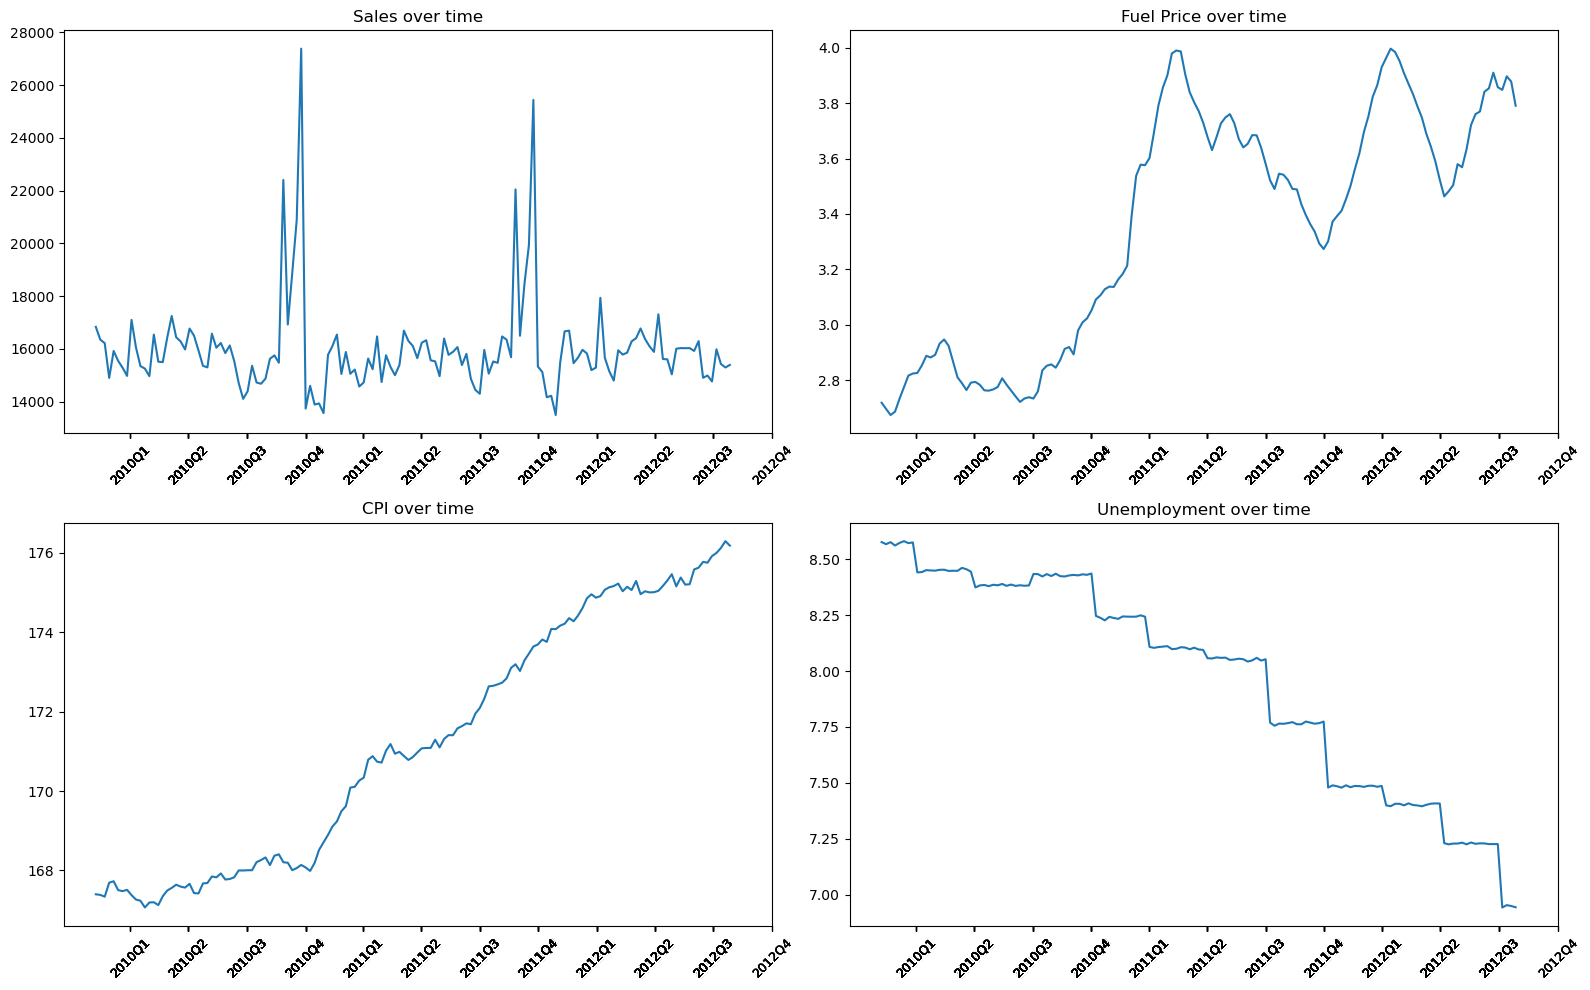

In [7]:
data_raw['Date'] = pd.to_datetime(data_raw['Date']) 

figure, axis = plt.subplots(2, 2, figsize=(16, 10)) 
sales = data_raw.groupby('Date')['Weekly_Sales'].mean()
fuel_price = data_raw.groupby('Date')['Fuel_Price'].mean()
cpi = data_raw.groupby('Date')['CPI'].mean()
unemployment = data_raw.groupby('Date')['Unemployment'].mean()
time = data_raw['Date'].unique()

quarters = pd.PeriodIndex(time, freq='Q')

axis[0, 0].plot(time, sales)
axis[0, 0].set_title("Sales over time")
axis[0, 0].set_xticks(quarters)
axis[0, 0].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[0, 1].plot(time, fuel_price)
axis[0, 1].set_title("Fuel Price over time")
axis[0, 1].set_xticks(quarters)
axis[0, 1].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[1, 0].plot(time, cpi)
axis[1, 0].set_title("CPI over time")
axis[1, 0].set_xticks(quarters)
axis[1, 0].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[1, 1].plot(time, unemployment)
axis[1, 1].set_title("Unemployment over time")
axis[1, 1].set_xticks(quarters)
axis[1, 1].set_xticklabels(quarters, rotation=45, fontsize = 9)

plt.tight_layout()
plt.show()


https://www.geeksforgeeks.org/how-to-prepare-data-before-deploying-a-machine-learning-model/?ref=ml_lbp

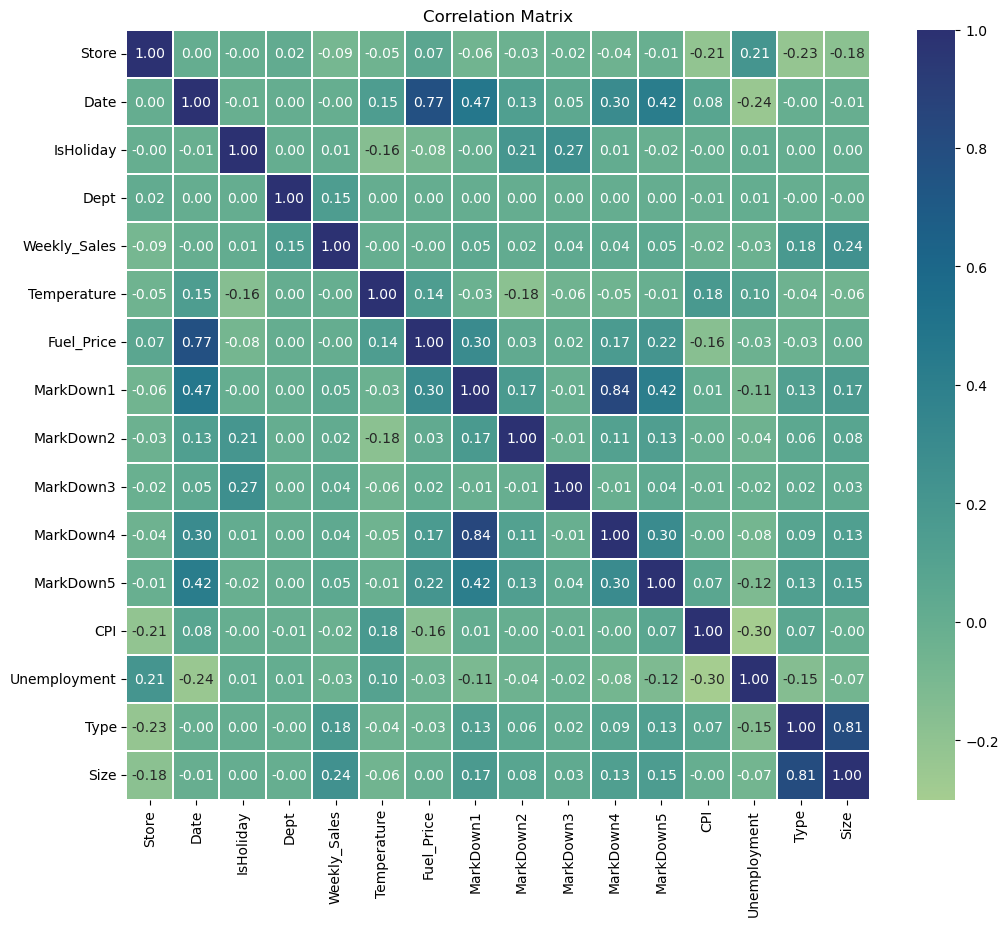

In [10]:
# Correlation plot 

corr_matrix = data_raw.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="crest",  fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

Perform Linear Regression Prediction, Random Forest and XGBoost (Gradient Boosting)